In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob


In [2]:
# Load metadata
metadata = pd.read_csv('metadata.csv')

# Check the first few rows
metadata.head()


,filename,group
0,snwmrda0010001_session_1_rest_1_aal_TCs.1D,NaN
1,snwmrda0010002_session_1_rest_1_aal_TCs.1D,NaN
2,snwmrda0010003_session_1_rest_1_aal_TCs.1D,TD
3,snwmrda0010004_session_1_rest_1_aal_TCs.1D,TD
4,snwmrda0010005_session_1_rest_1_aal_TCs.1D,NaN


In [4]:
def load_time_series(filepath):
    return np.loadtxt(filepath, comments='#', skiprows=1)


In [6]:
def load_time_series(filepath):
    df = pd.read_csv(filepath, delim_whitespace=True, header=None)
    # Drop the first column if it's non-numeric (e.g. ROI names or filenames)
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    df_clean = df_numeric.dropna(axis=1, how='any')  # drop non-numeric columns
    return df_clean.to_numpy()


In [7]:
# Try loading one subject
sample_file = os.path.join("data", metadata['filename'].iloc[0])
sample_data = load_time_series(sample_file)

print(f"Shape: {sample_data.shape}")


Shape: (173, 0)


/tmp/ipykernel_7423/2920065870.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, header=None)


In [8]:
def preview_file(filepath, n=5):
    with open(filepath, 'r') as f:
        for i in range(n):
            print(f.readline())

# Try previewing the first 5 lines
preview_file(os.path.join("data", metadata['filename'].iloc[0]))


File	Sub-brick	Mean_2001  	Mean_2002  	Mean_2101  	Mean_2102  	Mean_2111  	Mean_2112  	Mean_2201  	Mean_2202  	Mean_2211  	Mean_2212  	Mean_2301  	Mean_2302  	Mean_2311  	Mean_2312  	Mean_2321  	Mean_2322  	Mean_2331  	Mean_2332  	Mean_2401  	Mean_2402  	Mean_2501  	Mean_2502  	Mean_2601  	Mean_2602  	Mean_2611  	Mean_2612  	Mean_2701  	Mean_2702  	Mean_3001  	Mean_3002  	Mean_4001  	Mean_4002  	Mean_4011  	Mean_4012  	Mean_4021  	Mean_4022  	Mean_4101  	Mean_4102  	Mean_4111  	Mean_4112  	Mean_4201  	Mean_4202  	Mean_5001  	Mean_5002  	Mean_5011  	Mean_5012  	Mean_5021  	Mean_5022  	Mean_5101  	Mean_5102  	Mean_5201  	Mean_5202  	Mean_5301  	Mean_5302  	Mean_5401  	Mean_5402  	Mean_6001  	Mean_6002  	Mean_6101  	Mean_6102  	Mean_6201  	Mean_6202  	Mean_6211  	Mean_6212  	Mean_6221  	Mean_6222  	Mean_6301  	Mean_6302  	Mean_6401  	Mean_6402  	Mean_7001  	Mean_7002  	Mean_7011  	Mean_7012  	Mean_7021  	Mean_7022  	Mean_7101  	Mean_7102  	Mean_8101  	Mean_8102  	Mean_8111  	Mean_8112  	M

In [9]:
def load_time_series(filepath):
    df = pd.read_csv(filepath, sep='\t', engine='python')  # tab-separated
    # Drop first two columns: 'File' and 'Sub-brick'
    data = df.iloc[:, 2:]
    return data.to_numpy()


In [10]:
sample_file = os.path.join("data", metadata['filename'].iloc[0])
sample_data = load_time_series(sample_file)

print(f"Shape: {sample_data.shape}")


Shape: (172, 116)


In [11]:
def get_column_names(filepath):
    df = pd.read_csv(filepath, sep='\t', engine='python')
    return list(df.columns[2:])  # skip File and Sub-brick

# Run on one file
col_names = get_column_names(os.path.join("data", metadata['filename'].iloc[0]))
print(col_names[:5])  # preview


['Mean_2001  ', 'Mean_2002  ', 'Mean_2101  ', 'Mean_2102  ', 'Mean_2111  ']


In [12]:
dmn_roi_ids = [
    'Mean_2001', 'Mean_2002',  # mPFC
    'Mean_4021', 'Mean_4022',  # PCC/Precuneus
    'Mean_4011', 'Mean_4012',  # Inferior Parietal
    'Mean_8211', 'Mean_8212',  # Lateral Temporal Cortex
    'Mean_4101', 'Mean_4102',  # Hippocampus
]


In [14]:
df = pd.read_csv(os.path.join("data", metadata['filename'].iloc[0]), sep='\t', engine='python')
print(df.columns.tolist())


['File', 'Sub-brick', 'Mean_2001  ', 'Mean_2002  ', 'Mean_2101  ', 'Mean_2102  ', 'Mean_2111  ', 'Mean_2112  ', 'Mean_2201  ', 'Mean_2202  ', 'Mean_2211  ', 'Mean_2212  ', 'Mean_2301  ', 'Mean_2302  ', 'Mean_2311  ', 'Mean_2312  ', 'Mean_2321  ', 'Mean_2322  ', 'Mean_2331  ', 'Mean_2332  ', 'Mean_2401  ', 'Mean_2402  ', 'Mean_2501  ', 'Mean_2502  ', 'Mean_2601  ', 'Mean_2602  ', 'Mean_2611  ', 'Mean_2612  ', 'Mean_2701  ', 'Mean_2702  ', 'Mean_3001  ', 'Mean_3002  ', 'Mean_4001  ', 'Mean_4002  ', 'Mean_4011  ', 'Mean_4012  ', 'Mean_4021  ', 'Mean_4022  ', 'Mean_4101  ', 'Mean_4102  ', 'Mean_4111  ', 'Mean_4112  ', 'Mean_4201  ', 'Mean_4202  ', 'Mean_5001  ', 'Mean_5002  ', 'Mean_5011  ', 'Mean_5012  ', 'Mean_5021  ', 'Mean_5022  ', 'Mean_5101  ', 'Mean_5102  ', 'Mean_5201  ', 'Mean_5202  ', 'Mean_5301  ', 'Mean_5302  ', 'Mean_5401  ', 'Mean_5402  ', 'Mean_6001  ', 'Mean_6002  ', 'Mean_6101  ', 'Mean_6102  ', 'Mean_6201  ', 'Mean_6202  ', 'Mean_6211  ', 'Mean_6212  ', 'Mean_6221  ', 'Me

In [15]:
def load_dmn_timeseries(filepath, dmn_rois):
    # Load and strip whitespace from column names
    df = pd.read_csv(filepath, sep='\t', engine='python')
    df.columns = df.columns.str.strip()
    
    # Drop non-numeric columns
    df = df.drop(columns=['File', 'Sub-brick'])

    # Only select DMN columns that are present
    available_dmn = [roi for roi in dmn_rois if roi in df.columns]
    return df[available_dmn].to_numpy()


In [16]:
dmn_roi_ids = [
    'Mean_2001', 'Mean_2002',  # mPFC
    'Mean_4021', 'Mean_4022',  # PCC/Precuneus
    'Mean_4011', 'Mean_4012',  # Inferior Parietal
    'Mean_8211', 'Mean_8212',  # Lateral Temporal Cortex
    'Mean_4101', 'Mean_4102',  # Hippocampus
]


In [17]:
sample_file = os.path.join("data", metadata['filename'].iloc[0])
dmn_ts = load_dmn_timeseries(sample_file, dmn_roi_ids)

print(f"DMN shape: {dmn_ts.shape}")


DMN shape: (172, 10)


In [18]:
import numpy as np

def compute_dynamic_fc(time_series, window_size=30, step_size=5):
    n_timepoints, n_rois = time_series.shape
    windows = []
    
    for start in range(0, n_timepoints - window_size + 1, step_size):
        end = start + window_size
        window_data = time_series[start:end]
        corr_matrix = np.corrcoef(window_data.T)  # ROI x ROI correlation
        windows.append(corr_matrix)
    
    return np.stack(windows)  # Shape: (n_windows, n_rois, n_rois)


In [19]:
dyn_fc = compute_dynamic_fc(dmn_ts, window_size=30, step_size=5)
print(f"Dynamic FC shape: {dyn_fc.shape}")


Dynamic FC shape: (29, 10, 10)


In [20]:
from collections import defaultdict

# Store dynamic FCs per group
group_dyn_fc = defaultdict(list)

for i, row in metadata.iterrows():
    file_path = os.path.join("data", row['filename'])
    group = row['group']
    
    try:
        ts = load_dmn_timeseries(file_path, dmn_roi_ids)
        dyn_fc = compute_dynamic_fc(ts, window_size=30, step_size=5)
        group_dyn_fc[group].append(dyn_fc)
    except Exception as e:
        print(f"Skipping {row['filename']} due to error: {e}")


Skipping snwmrda0010016_session_1_rest_1_aal_TCs.1D due to error: [Errno 2] No such file or directory: 'data/snwmrda0010016_session_1_rest_1_aal_TCs.1D'
Skipping snwmrda0010027_session_1_rest_1_aal_TCs.1D due to error: [Errno 2] No such file or directory: 'data/snwmrda0010027_session_1_rest_1_aal_TCs.1D'
Skipping snwmrda0010055_session_1_rest_1_aal_TCs.1D due to error: [Errno 2] No such file or directory: 'data/snwmrda0010055_session_1_rest_1_aal_TCs.1D'
Skipping snwmrda0010098_session_1_rest_1_aal_TCs.1D due to error: [Errno 2] No such file or directory: 'data/snwmrda0010098_session_1_rest_1_aal_TCs.1D'
Skipping snwmrda0010105_session_1_rest_1_aal_TCs.1D due to error: [Errno 2] No such file or directory: 'data/snwmrda0010105_session_1_rest_1_aal_TCs.1D'
Skipping snwmrda0010127_session_1_rest_1_aal_TCs.1D due to error: [Errno 2] No such file or directory: 'data/snwmrda0010127_session_1_rest_1_aal_TCs.1D'
Skipping snwmrda1438162_session_1_rest_1_aal_TCs.1D due to error: [Errno 2] No suc

In [21]:
# Convert lists to arrays (subjects, windows, rois, rois)
for group in group_dyn_fc:
    group_dyn_fc[group] = np.stack(group_dyn_fc[group])
    print(f"{group} group shape: {group_dyn_fc[group].shape}")


nan group shape: (29, 29, 10, 10)
TD group shape: (59, 29, 10, 10)
ADHD group shape: (91, 29, 10, 10)


In [22]:
# Filter out nan group subjects
valid_groups = ['TD', 'ADHD']

# Create new dict to hold averaged matrices per subject
avg_group_dyn_fc = {}

for group in valid_groups:
    # Get subjects' dynamic FCs (n_subjects, n_windows, 10, 10)
    dyn_fc_all = group_dyn_fc[group]
    
    # Average over windows axis (axis=1)
    avg_fc = np.mean(dyn_fc_all, axis=1)  # shape: (n_subjects, 10, 10)
    avg_group_dyn_fc[group] = avg_fc
    
    print(f"{group} averaged FC shape: {avg_fc.shape}")


TD averaged FC shape: (59, 10, 10)
ADHD averaged FC shape: (91, 10, 10)


In [23]:
def extract_upper_tri(fc_matrices):
    # fc_matrices shape: (n_subjects, n_rois, n_rois)
    n_subjects, n_rois, _ = fc_matrices.shape
    triu_indices = np.triu_indices(n_rois, k=1)
    
    # Extract upper triangle for each subject, result shape: (n_subjects, n_edges)
    upper_tri_values = fc_matrices[:, triu_indices[0], triu_indices[1]]
    return upper_tri_values, triu_indices

# Extract upper triangles
td_upper, triu_idx = extract_upper_tri(avg_group_dyn_fc['TD'])
adhd_upper, _ = extract_upper_tri(avg_group_dyn_fc['ADHD'])


In [24]:
from scipy.stats import ttest_ind

p_vals = []
t_stats = []

for i in range(td_upper.shape[1]):
    t_stat, p_val = ttest_ind(td_upper[:, i], adhd_upper[:, i], equal_var=False)
    t_stats.append(t_stat)
    p_vals.append(p_val)

p_vals = np.array(p_vals)
t_stats = np.array(t_stats)


In [25]:
from statsmodels.stats.multitest import fdrcorrection

reject, p_vals_corrected = fdrcorrection(p_vals, alpha=0.05)
print(f"Significant edges after FDR correction: {np.sum(reject)}")


Significant edges after FDR correction: 2


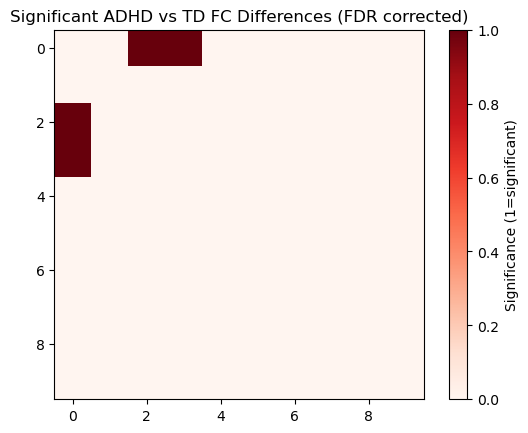

In [26]:
import matplotlib.pyplot as plt

n_rois = avg_group_dyn_fc['TD'].shape[1]
sig_matrix = np.zeros((n_rois, n_rois))
sig_matrix[triu_idx] = reject.astype(int)
sig_matrix = sig_matrix + sig_matrix.T  # make symmetric

plt.imshow(sig_matrix, cmap='Reds')
plt.title('Significant ADHD vs TD FC Differences (FDR corrected)')
plt.colorbar(label='Significance (1=significant)')
plt.show()


In [27]:
roi_names = dmn_roi_ids  # ROI list

print("Significant edges (ADHD vs TD):")
for i, sig in enumerate(reject):
    if sig:
        roi1 = roi_names[triu_idx[0][i]]
        roi2 = roi_names[triu_idx[1][i]]
        print(f"{roi1} - {roi2} | t = {t_stats[i]:.2f}, p = {p_vals_corrected[i]:.3e}")


Significant edges (ADHD vs TD):
Mean_2001 - Mean_4021 | t = -3.62, p = 1.341e-02
Mean_2001 - Mean_4022 | t = -3.53, p = 1.341e-02


/tmp/ipykernel_7423/705465919.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


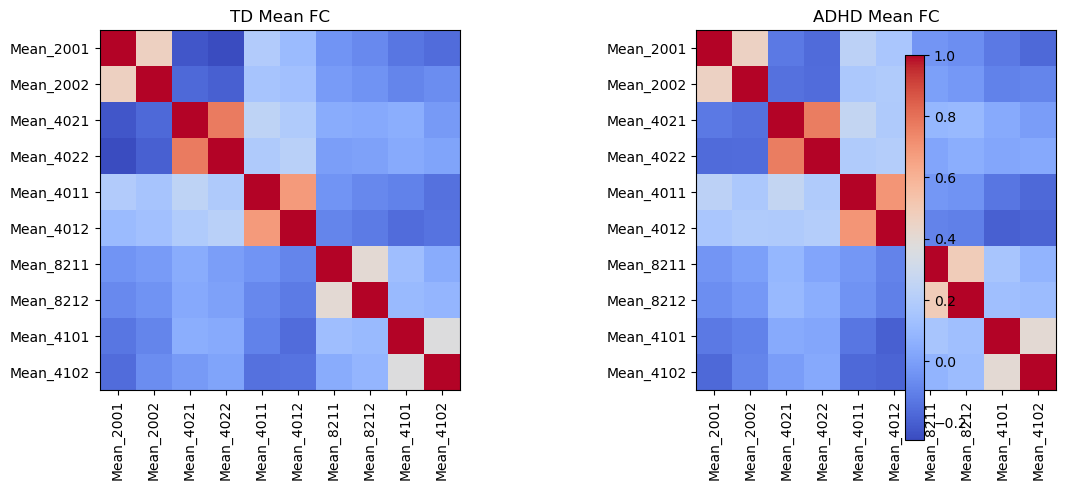

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

mean_td = np.mean(avg_group_dyn_fc['TD'], axis=0)
mean_adhd = np.mean(avg_group_dyn_fc['ADHD'], axis=0)

vmin = min(mean_td.min(), mean_adhd.min())
vmax = max(mean_td.max(), mean_adhd.max())

im1 = axes[0].imshow(mean_td, vmin=vmin, vmax=vmax, cmap='coolwarm')
axes[0].set_title('TD Mean FC')
axes[0].set_xticks(range(len(roi_names)))
axes[0].set_yticks(range(len(roi_names)))
axes[0].set_xticklabels(roi_names, rotation=90)
axes[0].set_yticklabels(roi_names)

im2 = axes[1].imshow(mean_adhd, vmin=vmin, vmax=vmax, cmap='coolwarm')
axes[1].set_title('ADHD Mean FC')
axes[1].set_xticks(range(len(roi_names)))
axes[1].set_yticks(range(len(roi_names)))
axes[1].set_xticklabels(roi_names, rotation=90)
axes[1].set_yticklabels(roi_names)

fig.colorbar(im1, ax=axes, orientation='vertical', fraction=.05, pad=0.04)
plt.tight_layout()
plt.show()


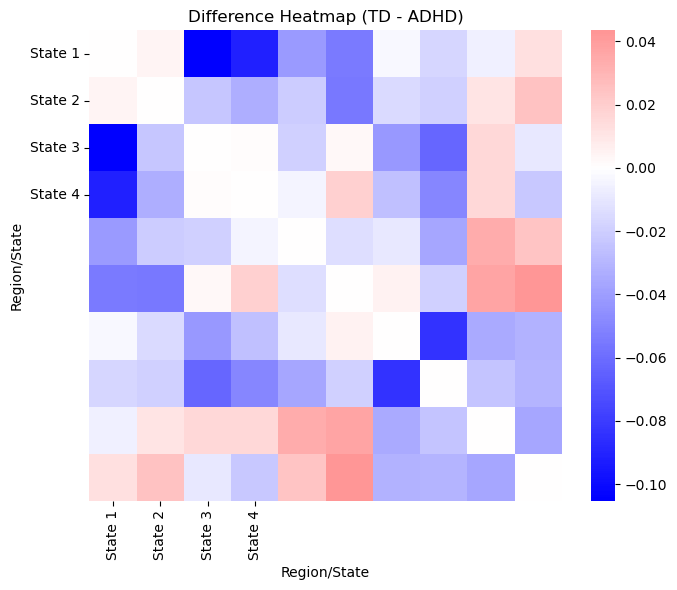

In [62]:
# Calculate the difference matrix  
diff_matrix = mean_td - mean_adhd  
  
# Plot the difference heatmap  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
plt.figure(figsize=(7, 6))  
sns.heatmap(diff_matrix, xticklabels=roi_names, yticklabels=roi_names, cmap='bwr', center=0, annot=False)  
plt.title('Difference Heatmap (TD - ADHD)')  
plt.xlabel('Region/State')  
plt.ylabel('Region/State')  
plt.tight_layout()  
plt.show()

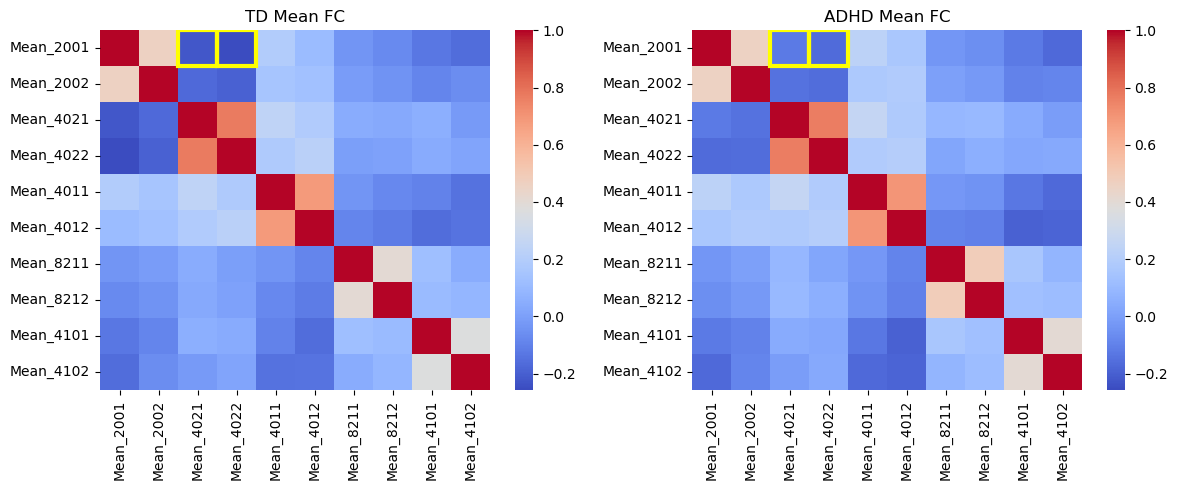

In [56]:
# List of significant edges (row, col) indices  
significant_edges = [(roi_names.index('Mean_2001'), roi_names.index('Mean_4021')),  
                     (roi_names.index('Mean_2001'), roi_names.index('Mean_4022'))]  
  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
sns.heatmap(mean_td, ax=axes[0], xticklabels=roi_names, yticklabels=roi_names, cmap='coolwarm', vmin=vmin, vmax=vmax)  
axes[0].set_title('TD Mean FC')  
sns.heatmap(mean_adhd, ax=axes[1], xticklabels=roi_names, yticklabels=roi_names, cmap='coolwarm', vmin=vmin, vmax=vmax)  
axes[1].set_title('ADHD Mean FC')  
  
# Annotate significant edges  
for ax in axes:  
    for (i, j) in significant_edges:  
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=3))  
  
plt.tight_layout()  
plt.show()

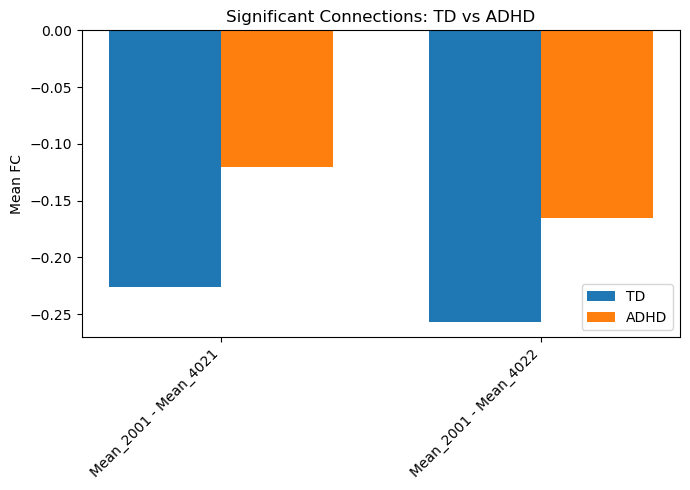

In [57]:
import numpy as np  
  
# Extract mean FC values for significant edges  
td_vals = [mean_td[i, j] for (i, j) in significant_edges]  
adhd_vals = [mean_adhd[i, j] for (i, j) in significant_edges]  
labels = [roi_names[i] + ' - ' + roi_names[j] for (i, j) in significant_edges]  
  
x = np.arange(len(labels))  
width = 0.35  
  
fig, ax = plt.subplots(figsize=(7, 5))  
rects1 = ax.bar(x - width/2, td_vals, width, label='TD')  
rects2 = ax.bar(x + width/2, adhd_vals, width, label='ADHD')  
  
ax.set_ylabel('Mean FC')  
ax.set_title('Significant Connections: TD vs ADHD')  
ax.set_xticks(x)  
ax.set_xticklabels(labels, rotation=45, ha='right')  
ax.legend()  
plt.tight_layout()  
plt.show()

Column means of mean_adhd:
[0.11844036 0.13003709 0.21649655 0.19644651 0.21715519 0.18620953
 0.16798806 0.16515977 0.12031952 0.10045813]
Column stds of mean_adhd:
[0.35272822 0.3423368  0.35788317 0.36591737 0.35367694 0.36974712
 0.31695685 0.31952626 0.33827553 0.34428562]


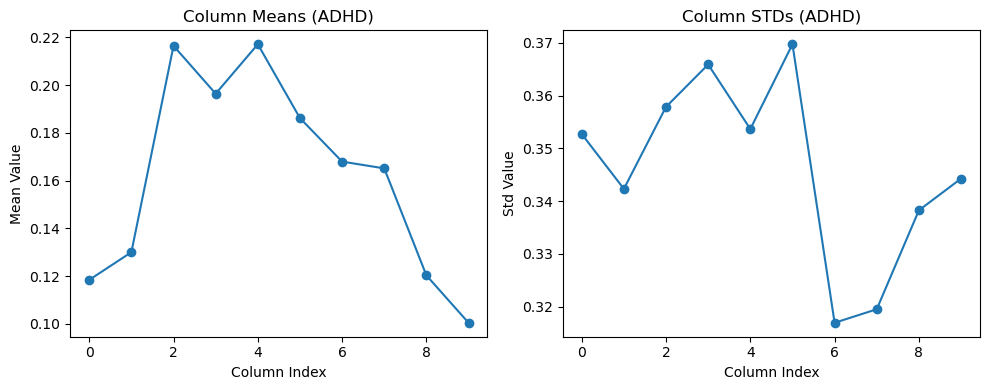

In [53]:
# Let's check if the issue is with the data itself by inspecting the mean_adhd matrix for any columns with constant or anomalous values.
import numpy as np
import matplotlib.pyplot as plt

# Assuming avg_group_dyn_fc and roi_names are already defined in environment
mean_td = np.mean(avg_group_dyn_fc['TD'], axis=0)
mean_adhd = np.mean(avg_group_dyn_fc['ADHD'], axis=0)

# Check for columns in mean_adhd that are constant or have unusual values
col_means = mean_adhd.mean(axis=0)
col_stds = mean_adhd.std(axis=0)

print('Column means of mean_adhd:')
print(col_means)
print('Column stds of mean_adhd:')
print(col_stds)

# Plot the column means and stds to visually inspect for anomalies
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(col_means, marker='o')
plt.title('Column Means (ADHD)')
plt.xlabel('Column Index')
plt.ylabel('Mean Value')
plt.subplot(1,2,2)
plt.plot(col_stds, marker='o')
plt.title('Column STDs (ADHD)')
plt.xlabel('Column Index')
plt.ylabel('Std Value')
plt.tight_layout()
plt.show()

In [29]:
# ROI names list, e.g.
roi_names = dmn_roi_ids  # ['Mean_2001  ', 'Mean_2002  ', ...]

# Clean up whitespace and extract numeric parts
roi_ids = [name.strip().split('_')[1] for name in roi_names]
print(roi_ids)


['2001', '2002', '4021', '4022', '4011', '4012', '8211', '8212', '4101', '4102']


In [30]:
aal_mapping = {
    '2001': 'Frontal_Sup_Medial_L',
    '2002': 'Frontal_Sup_Medial_R',
    '2101': 'Frontal_Med_Orb_L',
    '2102': 'Frontal_Med_Orb_R',
    '4021': 'Cingulum_Post_L',
    '4022': 'Cingulum_Post_R',
    # Add more as needed
}


In [31]:
def get_roi_label(code):
    return aal_mapping.get(code, f"Unknown_{code}")


In [32]:
print("Significant edges with anatomical labels:")

for i, sig in enumerate(reject):
    if sig:
        roi1_id = roi_names[triu_idx[0][i]].strip().split('_')[1]
        roi2_id = roi_names[triu_idx[1][i]].strip().split('_')[1]
        
        roi1_label = get_roi_label(roi1_id)
        roi2_label = get_roi_label(roi2_id)
        
        print(f"{roi1_label} - {roi2_label} | t = {t_stats[i]:.2f}, p = {p_vals_corrected[i]:.3e}")


Significant edges with anatomical labels:
Frontal_Sup_Medial_L - Cingulum_Post_L | t = -3.62, p = 1.341e-02
Frontal_Sup_Medial_L - Cingulum_Post_R | t = -3.53, p = 1.341e-02


In [33]:
!pip install networkx matplotlib


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ROI labels (anatomical names for all 10 DMN ROIs)
roi_labels = [get_roi_label(name.strip().split('_')[1]) for name in roi_names]

# Create graph
G = nx.Graph()

# Add nodes
for i, roi in enumerate(roi_labels):
    G.add_node(i, label=roi)

# Use average TD connectivity as edge weights for visualization
mean_td_fc = np.mean(avg_group_dyn_fc['TD'], axis=0)

# Add edges with weights
n_rois = len(roi_labels)
for i in range(n_rois):
    for j in range(i+1, n_rois):
        weight = mean_td_fc[i, j]
        G.add_edge(i, j, weight=weight)


In [35]:
# Significant edges indices (from previous step)
sig_edges = []
for i, sig in enumerate(reject):
    if sig:
        u = triu_idx[0][i]
        v = triu_idx[1][i]
        sig_edges.append((u, v))


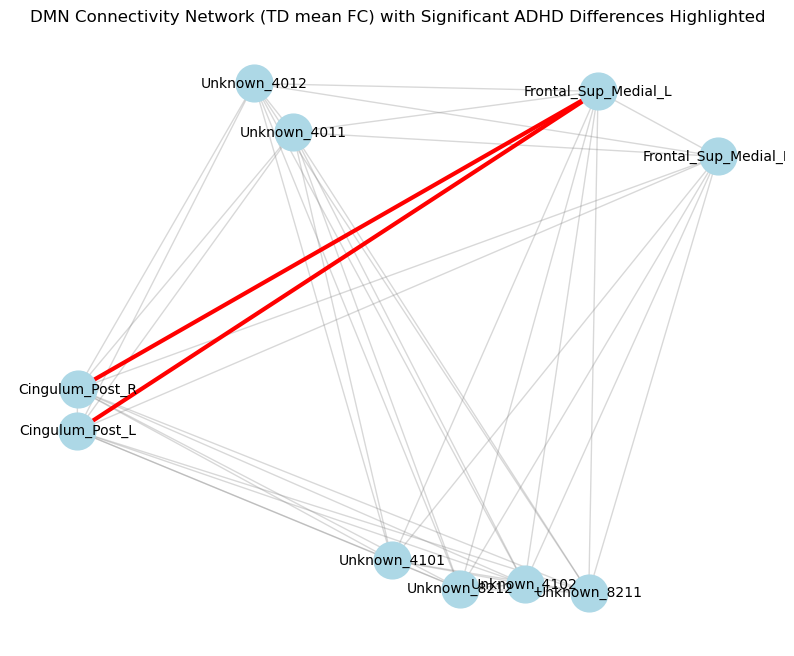

In [36]:
plt.figure(figsize=(10, 8))

# Position nodes in a circle (or try spring layout)
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Draw all edges with low alpha
all_weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.3)

# Highlight significant edges in red and thicker lines
nx.draw_networkx_edges(G, pos, edgelist=sig_edges, edge_color='red', width=3)

# Draw labels
nx.draw_networkx_labels(G, pos, labels={i: roi_labels[i] for i in range(n_rois)}, font_size=10)

plt.title("DMN Connectivity Network (TD mean FC) with Significant ADHD Differences Highlighted")
plt.axis('off')
plt.show()


In [40]:
import os
import numpy as np
import pandas as pd

# Load metadata
metadata = pd.read_csv('metadata.csv')

# List of all filenames in data folder
data_folder = 'data'
all_files = os.listdir(data_folder)

# Filter files to only those in metadata
ts_files = metadata['filename'].tolist()

# Check files available in folder matching metadata filenames
files_in_folder = [f for f in ts_files if f in all_files]

print(f"Found {len(files_in_folder)} matching files in folder")


Found 179 matching files in folder


In [41]:
def load_ts_file(filepath):
    # .1D files are space or tab separated
    ts = np.loadtxt(filepath)
    return ts  # shape: (timepoints, n_rois)


In [42]:
def compute_dynamic_fc(ts, window_size=30, step_size=1):
    """
    ts: time series array (timepoints x rois)
    window_size: number of timepoints per window
    step_size: sliding window step
    returns:
        dynamic_fc: array (n_windows x rois x rois)
    """
    n_timepoints, n_rois = ts.shape
    windows = []
    for start in range(0, n_timepoints - window_size + 1, step_size):
        window_ts = ts[start:start+window_size, :]
        corr_matrix = np.corrcoef(window_ts, rowvar=False)
        windows.append(corr_matrix)
    return np.array(windows)


In [44]:
import pandas as pd

def load_ts_file(filepath):
    # Try reading with pandas, skipping the first row if it's a header
    df = pd.read_csv(filepath, delim_whitespace=True, header=0)  # header=0 assumes first row is header
    return df.values  # return numpy array of numeric data


In [45]:
with open('data/snwmrda0010001_session_1_rest_1_aal_TCs.1D') as f:
    for _ in range(5):
        print(f.readline())


File	Sub-brick	Mean_2001  	Mean_2002  	Mean_2101  	Mean_2102  	Mean_2111  	Mean_2112  	Mean_2201  	Mean_2202  	Mean_2211  	Mean_2212  	Mean_2301  	Mean_2302  	Mean_2311  	Mean_2312  	Mean_2321  	Mean_2322  	Mean_2331  	Mean_2332  	Mean_2401  	Mean_2402  	Mean_2501  	Mean_2502  	Mean_2601  	Mean_2602  	Mean_2611  	Mean_2612  	Mean_2701  	Mean_2702  	Mean_3001  	Mean_3002  	Mean_4001  	Mean_4002  	Mean_4011  	Mean_4012  	Mean_4021  	Mean_4022  	Mean_4101  	Mean_4102  	Mean_4111  	Mean_4112  	Mean_4201  	Mean_4202  	Mean_5001  	Mean_5002  	Mean_5011  	Mean_5012  	Mean_5021  	Mean_5022  	Mean_5101  	Mean_5102  	Mean_5201  	Mean_5202  	Mean_5301  	Mean_5302  	Mean_5401  	Mean_5402  	Mean_6001  	Mean_6002  	Mean_6101  	Mean_6102  	Mean_6201  	Mean_6202  	Mean_6211  	Mean_6212  	Mean_6221  	Mean_6222  	Mean_6301  	Mean_6302  	Mean_6401  	Mean_6402  	Mean_7001  	Mean_7002  	Mean_7011  	Mean_7012  	Mean_7021  	Mean_7022  	Mean_7101  	Mean_7102  	Mean_8101  	Mean_8102  	Mean_8111  	Mean_8112  	M

In [46]:
import pandas as pd

def load_ts_file(filepath):
    # Read the full file as a DataFrame, tab or space delimited
    df = pd.read_csv(filepath, delim_whitespace=True, header=0)

    # Drop first two columns ('File' and 'Sub-brick'), keep ROI columns only
    roi_df = df.iloc[:, 2:]

    # Convert to numpy array (timepoints x rois)
    ts = roi_df.values.astype(float)
    return ts


In [49]:
ts = load_ts_file('data/snwmrda0010001_session_1_rest_1_aal_TCs.1D')


/tmp/ipykernel_7423/3937489647.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, header=0)


In [50]:
import os

print(os.listdir('data'))


['snwmrda0010080_session_1_rest_1_aal_TCs.1D', 'snwmrda0010005_session_1_rest_1_aal_TCs.1D', 'snwmrda0010097_session_1_rest_1_aal_TCs.1D', 'snwmrda0010064_session_1_rest_1_aal_TCs.1D', 'snwmrda0010051_session_1_rest_1_aal_TCs.1D', 'snwmrda0010022_session_1_rest_1_aal_TCs.1D', 'snwmrda0010043_session_1_rest_1_aal_TCs.1D', 'snwmrda0010050_session_1_rest_1_aal_TCs.1D', 'snwmrda3601861_session_1_rest_1_aal_TCs.1D', 'snwmrda0010063_session_1_rest_1_aal_TCs.1D', 'snwmrda4187857_session_1_rest_1_aal_TCs.1D', 'snwmrda0010002_session_1_rest_1_aal_TCs.1D', 'snwmrda0010067_session_1_rest_1_aal_TCs.1D', 'snwmrda2950672_session_1_rest_1_aal_TCs.1D', 'snwmrda1517240_session_1_rest_1_aal_TCs.1D', 'snwmrda0010113_session_1_rest_1_aal_TCs.1D', 'snwmrda0010029_session_1_rest_1_aal_TCs.1D', 'snwmrda1780174_session_1_rest_1_aal_TCs.1D', 'snwmrda8915162_session_1_rest_1_aal_TCs.1D', 'snwmrda0010087_session_1_rest_1_aal_TCs.1D', 'snwmrda0010112_session_1_rest_1_aal_TCs.1D', 'snwmrda0010089_session_1_rest_1_

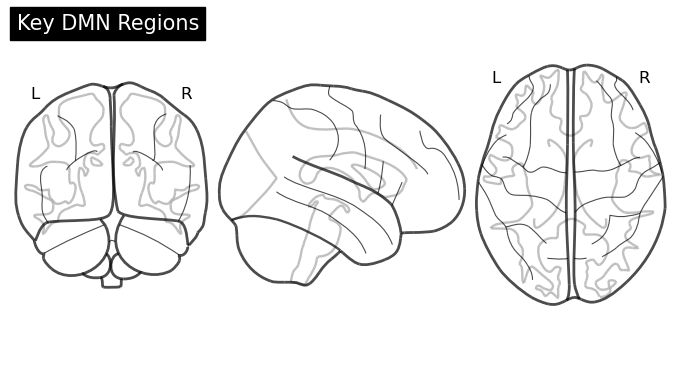

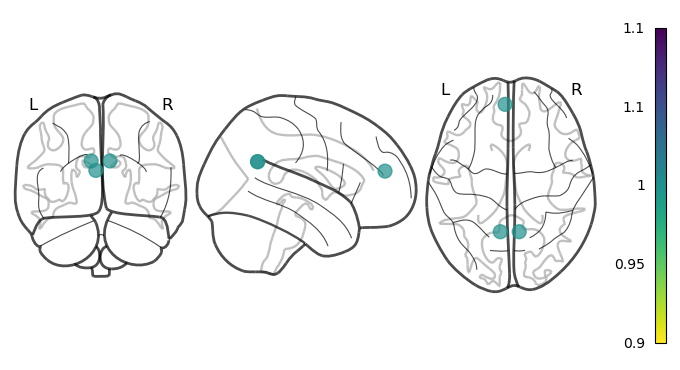

Displayed the glass brain with the Left mPFC and bilateral PCC regions marked.


In [1]:
# Let's plot the requested brain regions on a glass brain using nilearn.
# plot_markers requires both node_coords and node_values.
# We'll use node_values as a dummy array (all ones) just to plot the locations.
from nilearn import plotting
import matplotlib.pyplot as plt

coords = [(-4, 52, 18),   # Left mPFC
          (-8, -56, 26),  # Left PCC
          (8, -56, 26)]   # Right PCC
node_values = [1, 1, 1]  # Dummy values for plotting

# Plot the regions on a glass brain
plotting.plot_glass_brain(None, display_mode='ortho', colorbar=False, title='Key DMN Regions')
plotting.plot_markers(node_values=node_values, node_coords=coords, display_mode='ortho')
plt.show()

print('Displayed the glass brain with the Left mPFC and bilateral PCC regions marked.')

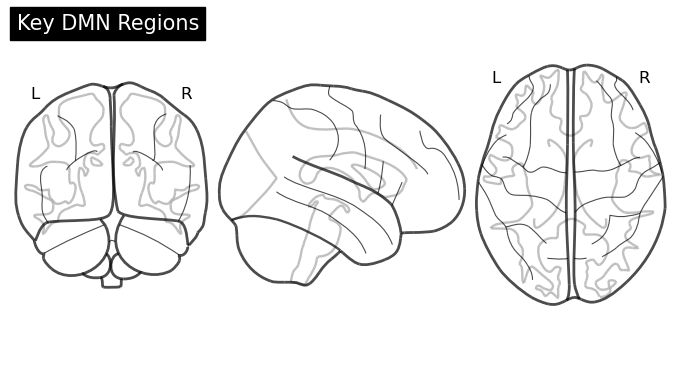

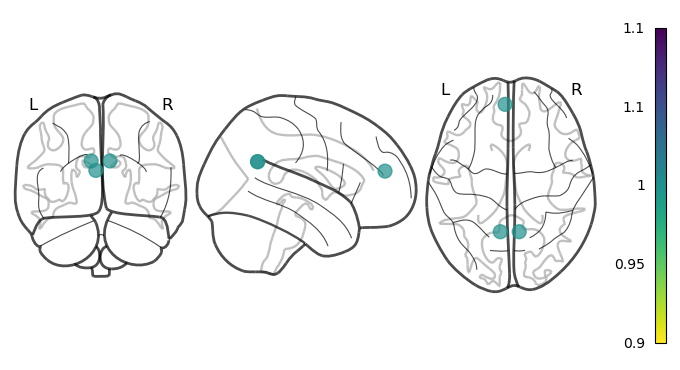

Left mPFC and bilateral PCC regions marked.


In [2]:
# Let's plot the requested brain regions on a glass brain using nilearn.
# plot_markers requires both node_coords and node_values.
# We'll use node_values as a dummy array (all ones) just to plot the locations.
from nilearn import plotting
import matplotlib.pyplot as plt

coords = [(-4, 52, 18),   # Left mPFC
          (-8, -56, 26),  # Left PCC
          (8, -56, 26)]   # Right PCC
node_values = [1, 1, 1]  # Dummy values for plotting

# Plot the regions on a glass brain
plotting.plot_glass_brain(None, display_mode='ortho', colorbar=False, title='Key DMN Regions')
plotting.plot_markers(node_values=node_values, node_coords=coords, display_mode='ortho')
plt.show()

print('Left mPFC and bilateral PCC regions marked.')